In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Set workspace

Create dataset with classes

In [10]:
d_classes = pd.read_csv('files.csv', delimiter=';')

d_classes.sort_values(by=['folder'], inplace=True)
d_classes.reset_index(drop=True, inplace=True)
d_classes.drop(columns = ['Unnamed: 0','folder'], inplace=True)

d_classes['class']=d_classes['class'].replace([1, 2, 3, 4, 5], 1)
d_classes['class']=d_classes['class'].replace([6, 7, 8], 2)
d_classes['class']=d_classes['class'].replace([9, 10], 3)

d_classes

,code,class
0,MR,1
1,MR,1
2,MR,1
3,MR,1
4,MR,1
...,...,...
463,FB,2
464,FF,2
465,FF,2
466,FS,2


Create list of datasets

In [11]:
path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
#path = "C:/Users/giuli/OneDrive/Desktop/SL4HD/Train2/"
#path = "C:/Users/hp/OneDrive - Politecnico di Milano/Università/STATISTICAL_LEARNING_FOR_HEALTHCAREDATA/SL4HD/Train2/"

all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    d_file = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(d_file)

### **Feature Engineering**

#### Mean

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

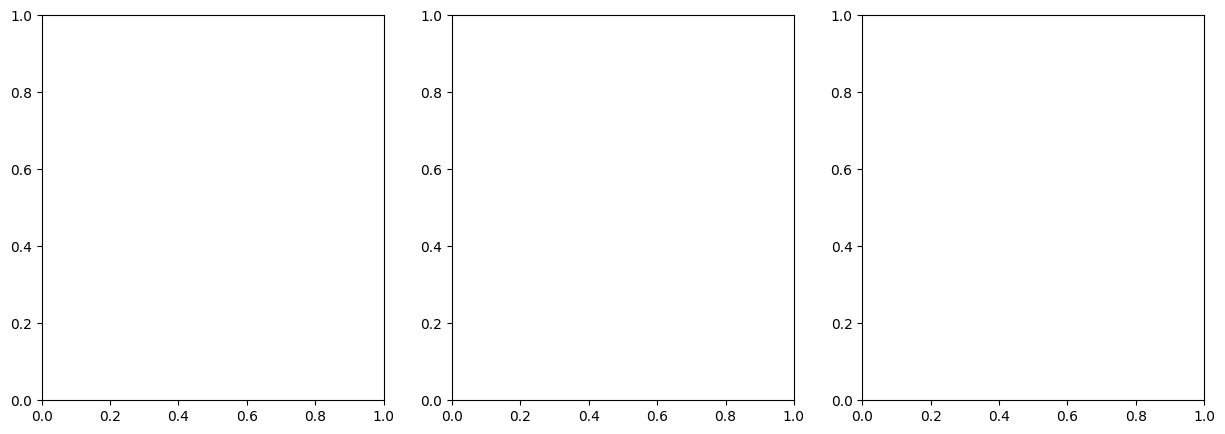

In [12]:
means_x = []
means_y = []
means_z = []

for i in np.arange(len(li)):
    means_x.append(li[i].x.mean())
    means_y.append(li[i].y.mean())
    means_z.append(li[i].z.mean())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=means_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=means_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=means_z,data=d_classes,ax=axs[2])

#### Variance

<Axes: xlabel='class'>

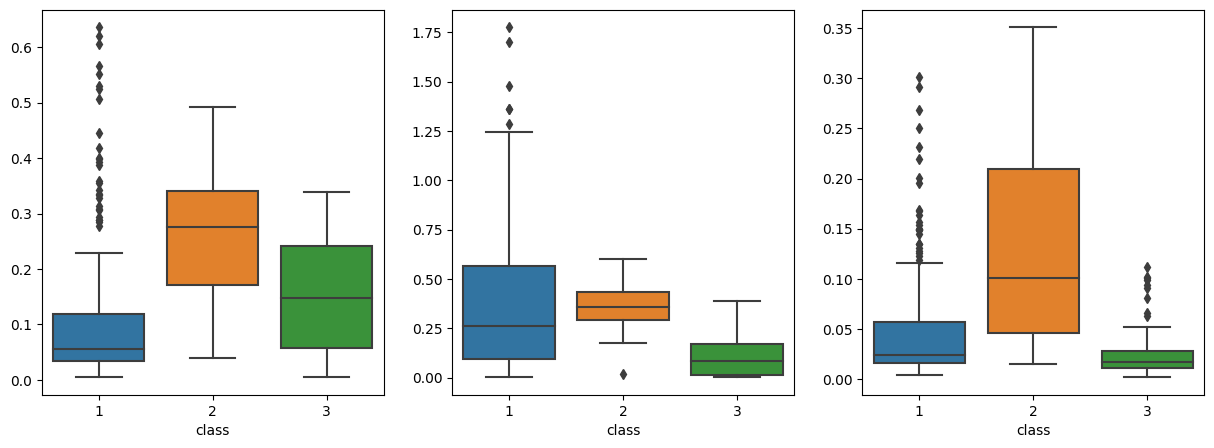

In [ ]:
vars_x = []
vars_y = []
vars_z = []

for i in np.arange(len(li)):
    vars_x.append(li[i].x.var())
    vars_y.append(li[i].y.var())
    vars_z.append(li[i].z.var())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=vars_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=vars_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=vars_z,data=d_classes,ax=axs[2])

#### Median

<Axes: xlabel='class'>

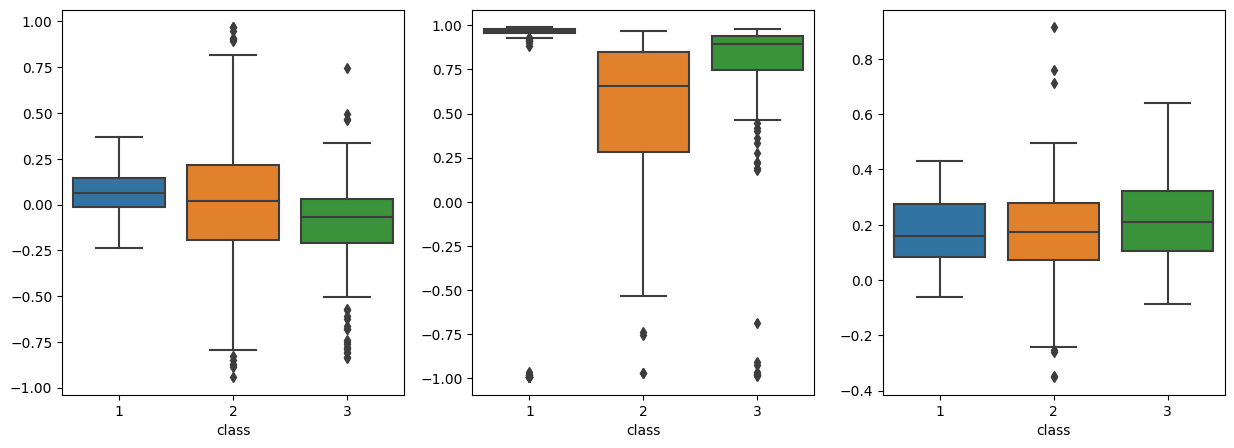

In [ ]:
median_x = []
median_y = []
median_z = []

for i in np.arange(len(li)):
    t = np.asarray(li[i].t)

    median_x.append(np.median(li[i].x))

    median_y.append(np.median(li[i].y))

    median_z.append(np.median(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=median_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=median_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=median_z,data=d_classes,ax=axs[2])

#### Mode

<Axes: xlabel='class'>

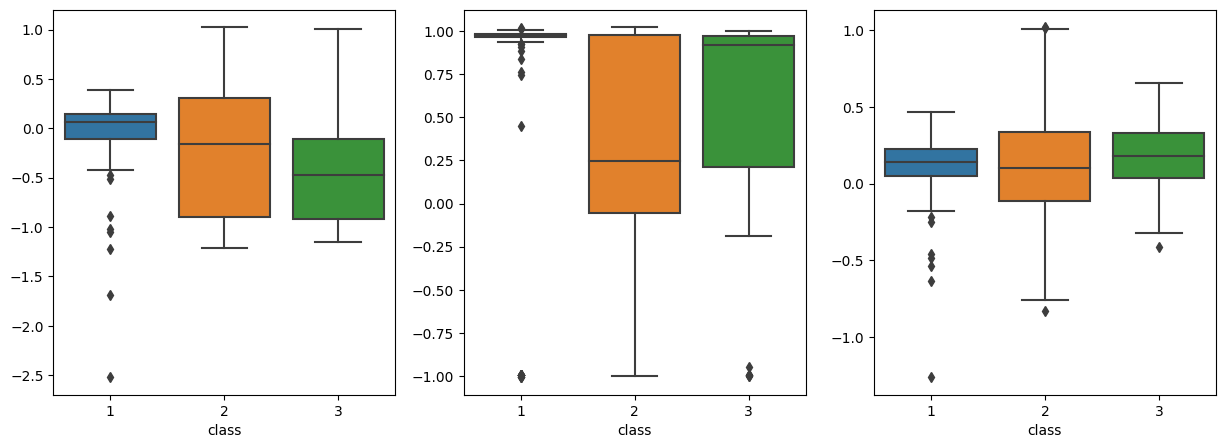

In [ ]:
from scipy import stats

mode_x = []
mode_y = []
mode_z = []

for i in np.arange(len(li)):
    mode_x.append(stats.mode(li[i].x, keepdims = True)[0][0])
    mode_y.append(stats.mode(li[i].y, keepdims = True)[0][0])
    mode_z.append(stats.mode(li[i].z, keepdims = True)[0][0])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=mode_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=mode_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=mode_z,data=d_classes,ax=axs[2])

#### RMS

<Axes: xlabel='class'>

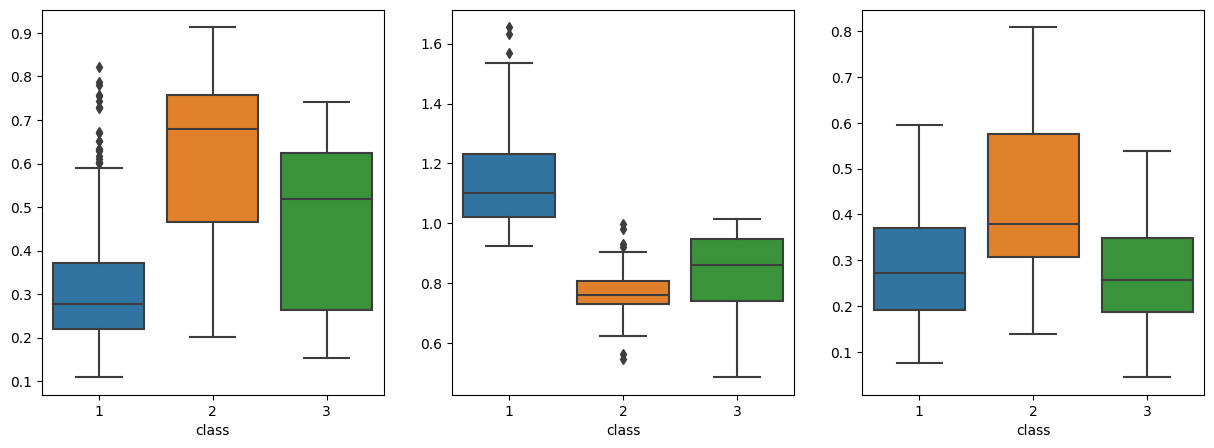

In [ ]:
rms_x = []
rms_y = []
rms_z = []

for i in np.arange(len(li)):
    rms_x.append(np.sqrt(np.mean(np.square(li[i].x))))
    rms_y.append(np.sqrt(np.mean(np.square(li[i].y))))
    rms_z.append(np.sqrt(np.mean(np.square(li[i].z))))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=rms_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=rms_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=rms_z,data=d_classes,ax=axs[2])

#### Interquartile Range

<Axes: xlabel='class'>

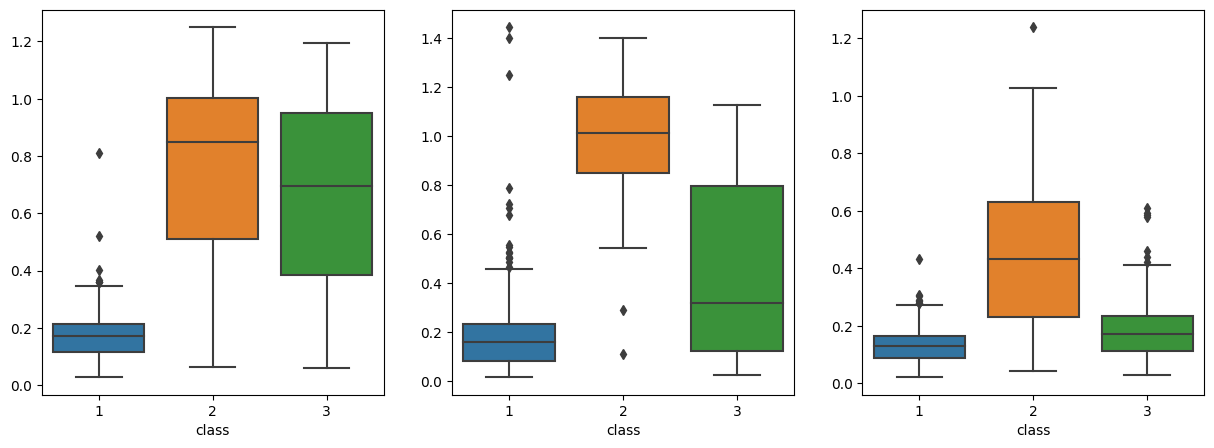

In [ ]:
interq_x = []
interq_y = []
interq_z = []

for i in np.arange(len(li)):
    interq_x.append(np.percentile(li[i].x, 75) - np.percentile(li[i].x, 25))
    interq_y.append(np.percentile(li[i].y, 75) - np.percentile(li[i].y, 25))
    interq_z.append(np.percentile(li[i].z, 75) - np.percentile(li[i].z, 25))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=interq_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=interq_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=interq_z,data=d_classes,ax=axs[2])

#### Min-Max & Arg-Max - Arg-Min (with polynomials)

In [ ]:
 # Create columns of the output dataset

k = 3
    # Create columns of the output dataset
columns = []
for prefix in ['x', 'y', 'z']:
    for i in range(0, k+1):
        columns.append(f"{prefix}_{i}")
d_poly = pd.DataFrame(columns=columns)

# Loop over all the .csv tables
for i in np.arange(len(li)):

    # Get values from every table
    x = np.asarray(li[i].x)
    y = np.asarray(li[i].y)
    z = np.asarray(li[i].z)
    t = np.asarray(li[i].t)

    # Get coefficients of the polynomial fit of order k of x, y, z
    coef_x = np.polyfit(t,x,deg=k,full=False)
    coef_y = np.polyfit(t,y,deg=k,full=False)
    coef_z = np.polyfit(t,z,deg=k,full=False)

    # Add coefficients to the final dataset
    row = []
    for j in np.arange(k+1):
        row.append(coef_x[j])
    for j in np.arange(k+1):
        row.append(coef_y[j])
    for j in np.arange(k+1):
        row.append(coef_z[j])
    d_poly.loc[i] = row


<Axes: xlabel='class'>

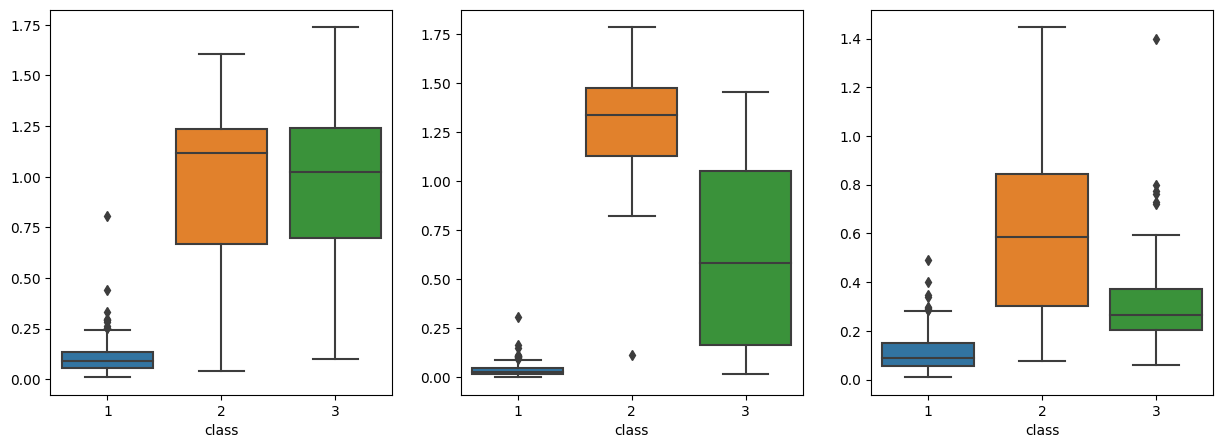

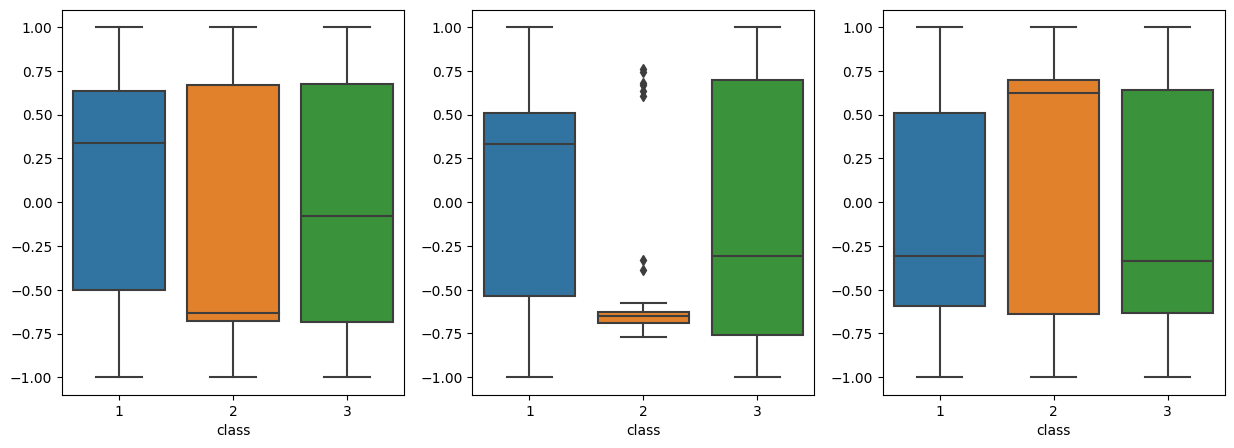

In [ ]:
delta_x = []
deltarg_x = []
delta_y = []
deltarg_y = []
delta_z = []
deltarg_z = []

for i in np.arange(len(li)):

    t = np.asarray(li[i].t)
    len_t = len(li[i])

    coef_x = d_poly.iloc[i,:4]
    poly_x = np.poly1d(coef_x)
    delta_x.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x.append((np.argmax(poly_x(t))-np.argmin(poly_x(t)))/len_t)

    coef_y = d_poly.iloc[i,4:8]
    poly_y = np.poly1d(coef_y)
    delta_y.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y.append((np.argmax(poly_y(t))-np.argmin(poly_y(t)))/len_t)

    coef_z = d_poly.iloc[i,8:]
    poly_z = np.poly1d(coef_z)
    delta_z.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z.append((np.argmax(poly_z(t))-np.argmin(poly_z(t)))/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=delta_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=delta_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=delta_z,data=d_classes,ax=axs[2])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=deltarg_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=deltarg_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=deltarg_z,data=d_classes,ax=axs[2])

#### Length

<Axes: xlabel='class'>

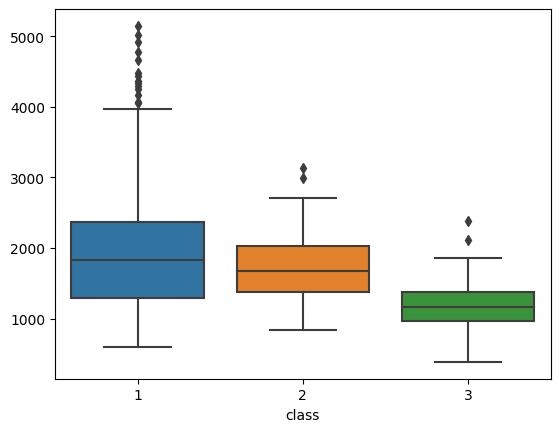

In [ ]:
length = []

for i in np.arange(len(li)): 
    length.append(len(li[i]))
    
sns.boxplot(x='class',y=length, data=d_classes)

#### %Peaks over Threshold

<Axes: xlabel='class'>

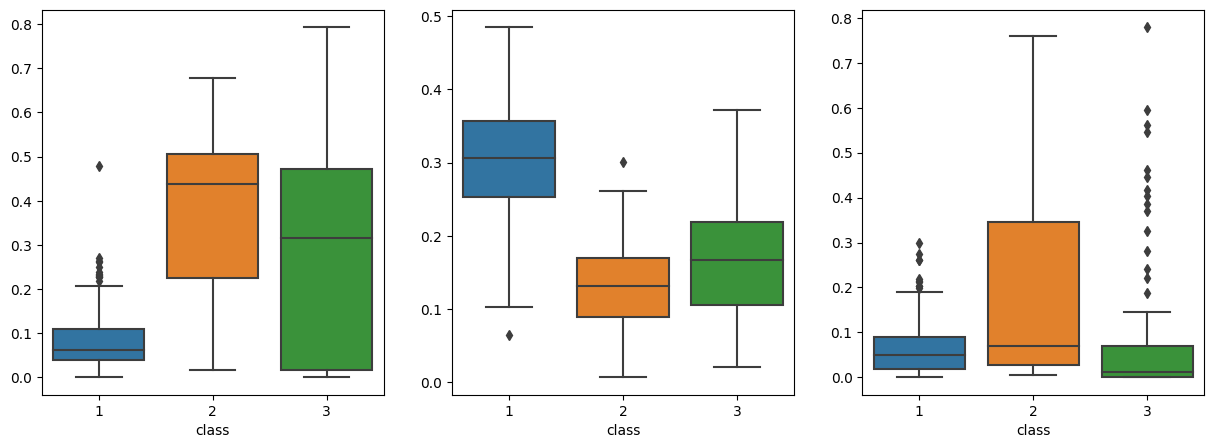

In [ ]:
peaks_x = []
peaks_y = []
peaks_z = []
eps_x = 0.5
eps_y = 1
eps_z = 0.5

for i, item in enumerate(li):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x.append(count_x/len_t)
    peaks_y.append(count_y/len_t)
    peaks_z.append(count_z/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=peaks_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=peaks_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=peaks_z,data=d_classes,ax=axs[2])

#### %Positive Points

<Axes: xlabel='class'>

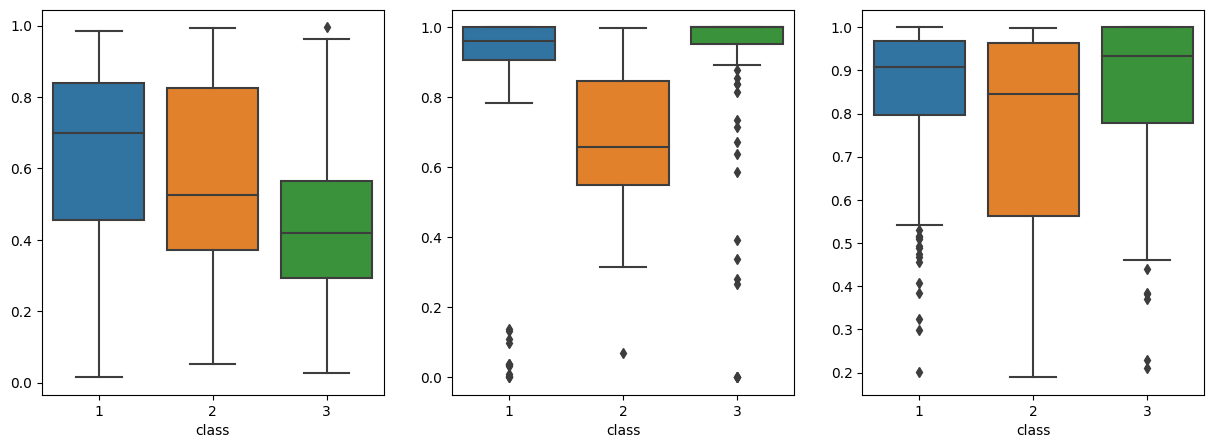

In [ ]:
pn_x = []
pn_y = []
pn_z = []

for i in np.arange(len(li)):
    pos_x = li[i][li[i].x>=0].x.count()
    neg_x = li[i][li[i].x<0].x.count()

    pos_y = li[i][li[i].y>=0].y.count()
    neg_y = li[i][li[i].y<0].y.count()

    pos_z = li[i][li[i].z>=0].z.count()
    neg_z = li[i][li[i].z<0].z.count()

    pn_x.append(pos_x/(pos_x+neg_x))
    pn_y.append(pos_y/(pos_y+neg_y))
    pn_z.append(pos_z/(pos_z+neg_z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=pn_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=pn_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=pn_z,data=d_classes,ax=axs[2])

#### %Zero Crossing Points

<Axes: xlabel='class'>

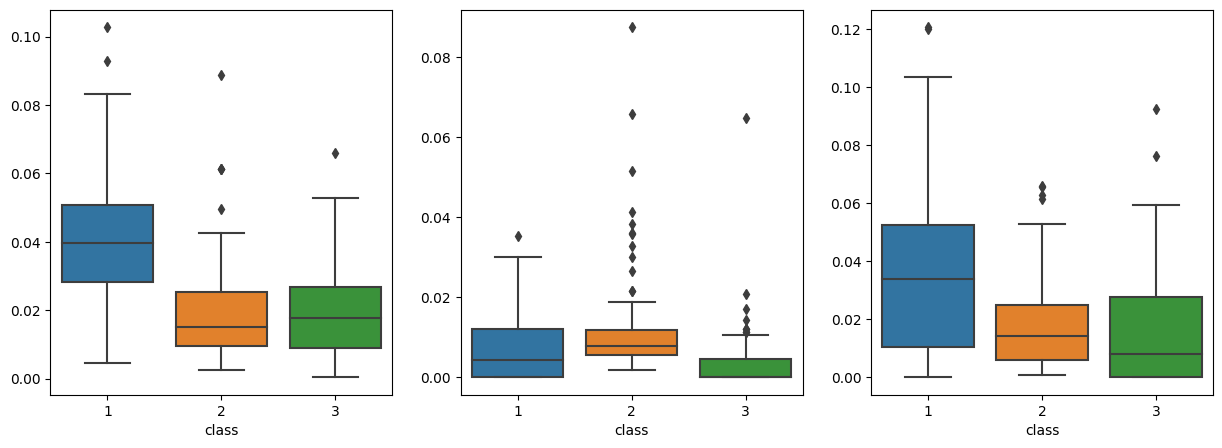

In [ ]:
zero_crossing_x = []
zero_crossing_y = []
zero_crossing_z = []

for i in np.arange(len(li)):
    zero_crossing_x.append(len(np.where(np.diff(np.sign(li[i].x)))[0]) / len(li[i].x))
    zero_crossing_y.append(len(np.where(np.diff(np.sign(li[i].y)))[0]) / len(li[i].y))
    zero_crossing_z.append(len(np.where(np.diff(np.sign(li[i].z)))[0]) / len(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=zero_crossing_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=zero_crossing_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=zero_crossing_z,data=d_classes,ax=axs[2])

#### Energy

<Axes: xlabel='class'>

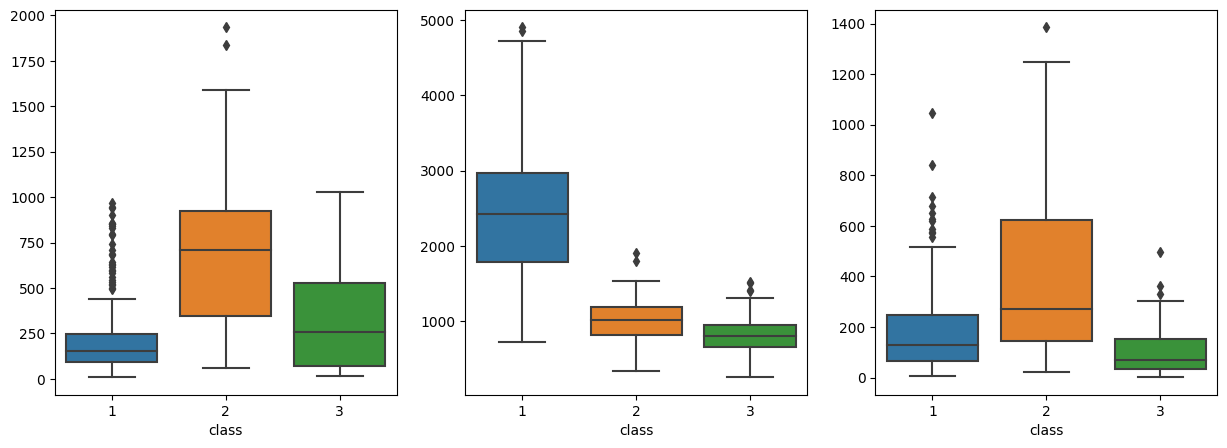

In [ ]:
energies_x = []
energies_y = []
energies_z = []

for i in np.arange(len(li)):

    en_x = np.sum(li[i].x**2)
    en_y = np.sum(li[i].y**2)
    en_z = np.sum(li[i].z**2)
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    energies_x.append(en_x)
    energies_y.append(en_y)
    energies_z.append(en_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=energies_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=energies_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=energies_z,data=d_classes,ax=axs[2])

#### Power

<Axes: xlabel='class'>

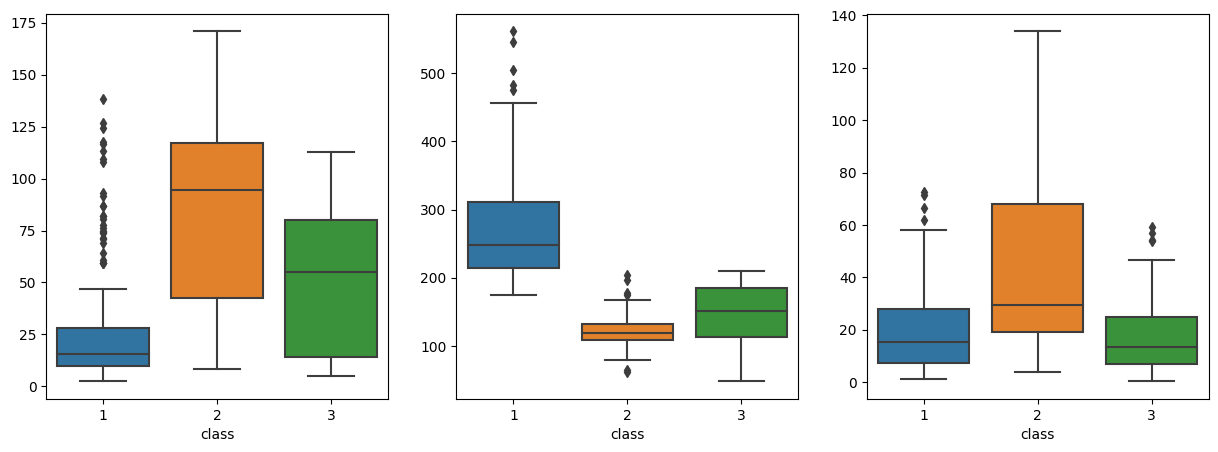

In [ ]:
powers_x = []
powers_y = []
powers_z = []

for i in np.arange(len(li)):

    duration = li[i].t[len(li[i])-1]-li[i].t[0]
    pow_x = np.sum(li[i].x**2)/duration
    pow_y = np.sum(li[i].y**2)/duration
    pow_z = np.sum(li[i].z**2)/duration
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    powers_x.append(pow_x)
    powers_y.append(pow_y)
    powers_z.append(pow_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=powers_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=powers_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=powers_z,data=d_classes,ax=axs[2])

#### Skewness

<Axes: xlabel='class'>

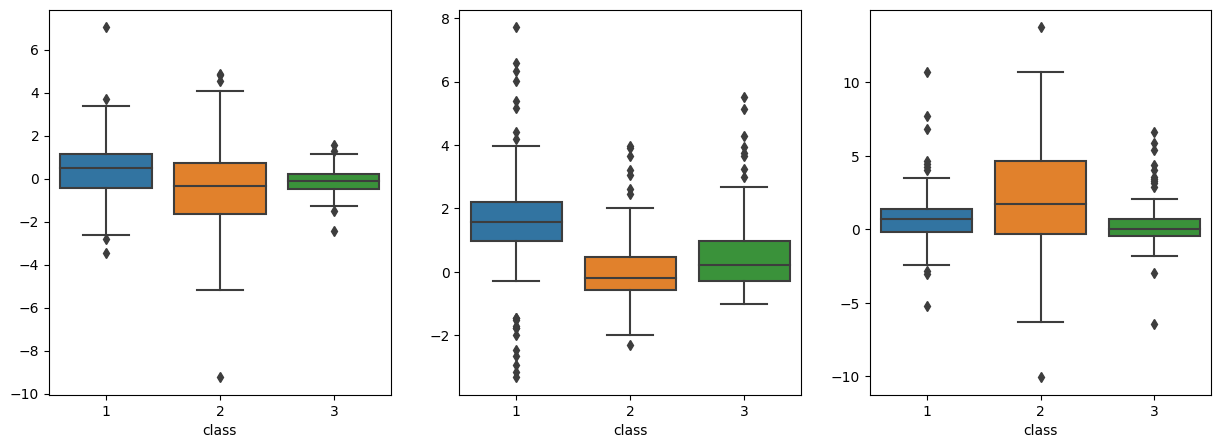

In [ ]:
from scipy.stats import skew

skew_x = []
skew_y = []
skew_z = []

for i in np.arange(len(li)):
    skew_x.append(skew(li[i].x))
    skew_y.append(skew(li[i].y))
    skew_z.append(skew(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=skew_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=skew_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=skew_z,data=d_classes,ax=axs[2])


#### Kurtosis

(-10.0, 160.0)

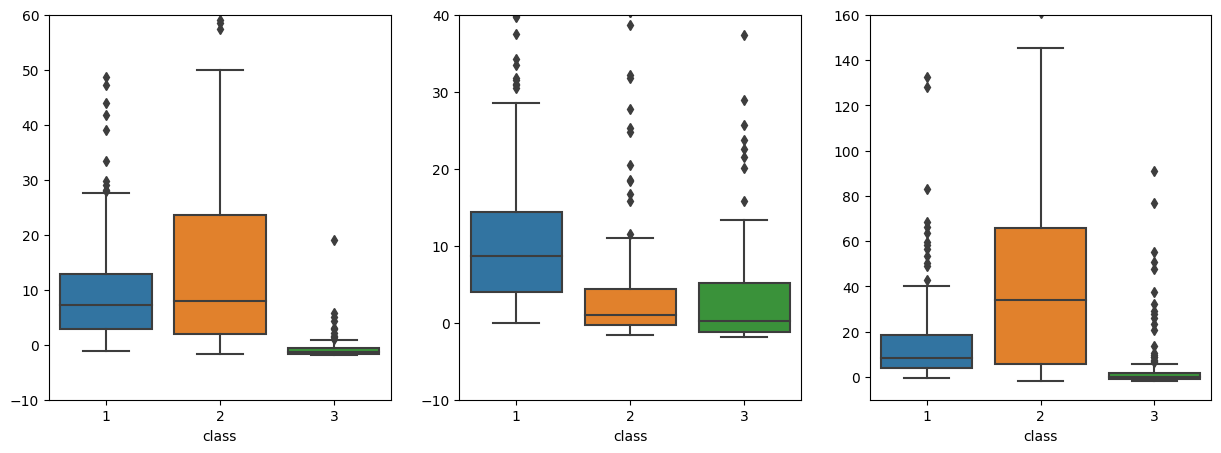

In [ ]:
from scipy.stats import kurtosis

kurtosis_x = []
kurtosis_y = []
kurtosis_z = []

for i in np.arange(len(li)):
    kurtosis_x.append(kurtosis(li[i].x))
    kurtosis_y.append(kurtosis(li[i].y))
    kurtosis_z.append(kurtosis(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=kurtosis_x,data=d_classes,ax=axs[0])
axs[0].set_ylim(-10,60)
sns.boxplot(x='class',y=kurtosis_y,data=d_classes,ax=axs[1])
axs[1].set_ylim(-10,40)
sns.boxplot(x='class',y=kurtosis_z,data=d_classes,ax=axs[2])
axs[2].set_ylim(-10,160)

#### Entropy

<Axes: xlabel='class'>

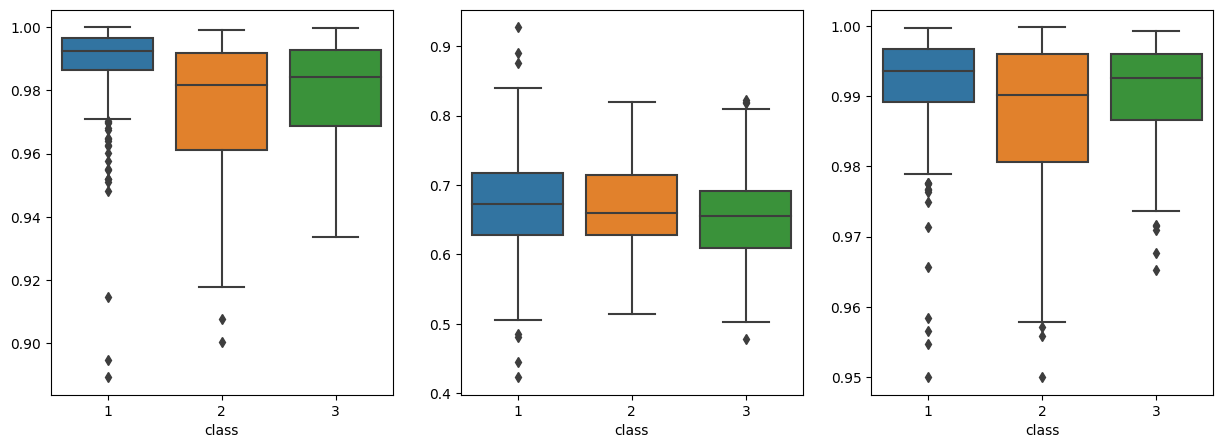

In [ ]:
entropy_x = []
entropy_y = []
entropy_z = []

for i in np.arange(len(li)):
    valuex, countsx = np.unique(li[i].x, return_counts=True)
    px = countsx / countsx.sum()
    px = px[np.where(px != 0)]
    if np.log2(len(li[i].x)) == 1:
        entropy_x.append(0)
    elif np.sum(px * np.log2(px)) / np.log2(len(li[i].x)) == 0:
        entropy_x.append(0)
    else:
        entropy_x.append(- np.sum(px * np.log2(px)) / np.log2(len(li[i].x)))
        
    valuey, countsy = np.unique(li[i].y, return_counts=True)
    py = countsy / countsy.sum()
    py = py[np.where(py != 0)]
    if np.log2(len(li[i].y)) == 1:
        entropy_y.append(0)
    elif np.sum(py * np.log2(py)) / np.log2(len(li[i].y)) == 0:
        entropy_y.append(0)
    else:
        entropy_y.append(- np.sum(py * np.log2(py)) / np.log2(len(li[i].y)))
        
    valuez, countsz = np.unique(li[i].z, return_counts=True)
    pz = countsz / countsz.sum()
    pz = pz[np.where(pz != 0)]
    if np.log2(len(li[i].z)) == 1:
        entropy_z.append(0)
    elif np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)) == 0:
        entropy_z.append(0)
    else:
        entropy_z.append(- np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)))
   
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=entropy_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=entropy_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=entropy_z,data=d_classes,ax=axs[2])

#### Temporal Centroid

<Axes: xlabel='class'>

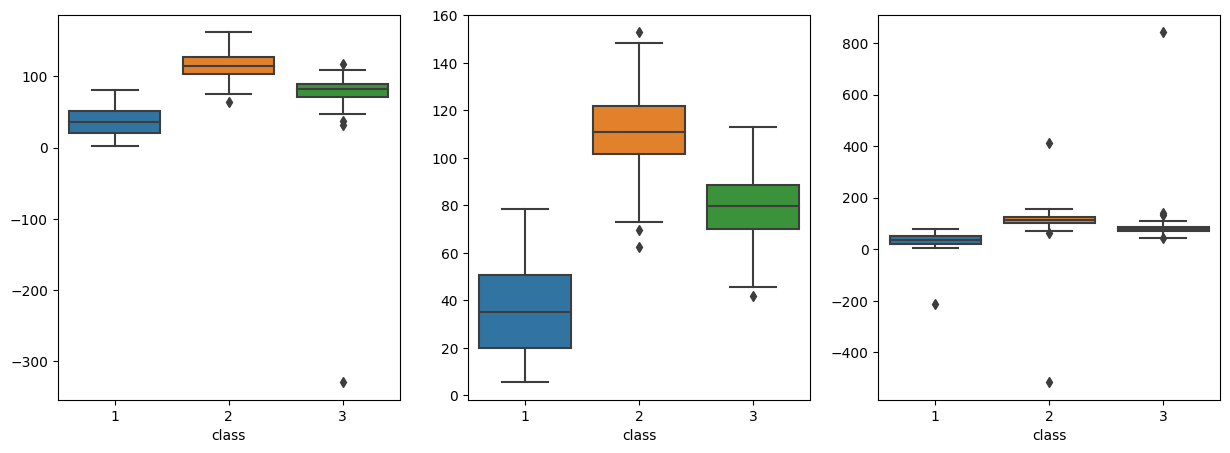

In [ ]:
temporal_centroid_x = []
temporal_centroid_y = []
temporal_centroid_z = []

for i in np.arange(len(li)):
    temporal_centroid_x.append(np.sum(li[i].t * li[i].x) / np.sum(li[i].x))
    temporal_centroid_y.append(np.sum(li[i].t * li[i].y) / np.sum(li[i].y))
    temporal_centroid_z.append(np.sum(li[i].t * li[i].z) / np.sum(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=temporal_centroid_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=temporal_centroid_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=temporal_centroid_z,data=d_classes,ax=axs[2])

### Create final dataset

In [ ]:
data = pd.DataFrame({'mean_x': means_x,
                    'mean_y': means_y,
                    'var_x': vars_x,
                    'var_y': vars_y,
                    'var_z': vars_z,
                    'rms_x': rms_x,
                    'rms_y': rms_y,
                    'rms_z': rms_z,
                    'iq_range_x': interq_x,
                    'iq_range_y': interq_y,
                    'iq_range_z': interq_z,
                    'max-min_x': delta_x,
                    'max-min_y': delta_y,
                    'max-min_z': delta_z,
                    '%_peaks_x': peaks_x,
                    '%_peaks_y': peaks_y,
                    '%_positive_y': pn_y,
                    'power_x': powers_x,
                    'power_y': powers_y,
                    'power_z': powers_z,
                    'temporal_centroid_x': temporal_centroid_x,
                    'temporal_centroid_y': temporal_centroid_y,
                    'temporal_centroid_z': temporal_centroid_z
                    })
            
data = pd.concat([data,d_classes],axis=1)
data = data.drop('code',axis=1)
data

,mean_x,mean_y,var_x,var_y,var_z,rms_x,rms_y,rms_z,iq_range_x,iq_range_y,...,%_peaks_x,%_peaks_y,%_positive_y,power_x,power_y,power_z,temporal_centroid_x,temporal_centroid_y,temporal_centroid_z,class
0,0.197327,0.984034,0.635922,1.034954,0.157123,0.821209,1.415098,0.445838,0.275836,0.248840,...,0.261976,0.353293,0.896707,138.207770,410.391686,40.736029,49.637285,49.406692,49.042419,1
1,0.256494,0.971935,0.358201,0.907888,0.149493,0.650981,1.360884,0.388593,0.159835,0.138210,...,0.197133,0.294504,0.881720,86.840585,379.514685,30.944051,37.487597,37.482466,38.069584,1
2,0.234874,0.987340,0.398661,0.952047,0.128058,0.673472,1.387898,0.371314,0.192855,0.113570,...,0.207510,0.314229,0.895916,92.954040,394.770334,28.256086,38.245625,37.869585,38.917355,1
3,0.135252,0.978889,0.551640,1.362784,0.195095,0.754688,1.523179,0.486928,0.273812,0.233000,...,0.263555,0.412491,0.879890,116.714582,475.435539,48.586830,53.756702,53.326641,53.309472,1
4,0.057615,0.968606,0.524964,1.285501,0.268192,0.726635,1.490972,0.594972,0.228837,0.272480,...,0.226877,0.321545,0.898259,108.189556,455.504133,72.534759,60.549150,59.576338,58.969607,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.418134,-0.397167,0.333795,0.477936,0.017336,0.713056,0.797131,0.148226,1.051613,1.283470,...,0.466268,0.260609,0.447225,104.183978,130.200430,4.501975,125.034414,118.733588,123.480492,2
464,-0.504110,-0.497165,0.235744,0.364027,0.019134,0.699766,0.781598,0.138963,0.919282,1.050468,...,0.429648,0.163317,0.388610,100.372400,125.220404,3.958287,96.688278,93.835951,105.869677,2
465,-0.504246,-0.564383,0.335457,0.303479,0.031983,0.767744,0.788508,0.182351,0.987349,0.860910,...,0.487069,0.206897,0.069828,120.908967,127.537516,6.820910,99.040011,96.642184,102.549907,2
466,-0.084112,-0.532522,0.115677,0.509875,0.268020,0.350269,0.890602,0.674110,0.062300,1.200540,...,0.048199,0.203324,0.361773,25.165036,162.690348,93.208517,108.436436,104.562922,108.972164,2


#### **Study of correlation**

<Axes: >

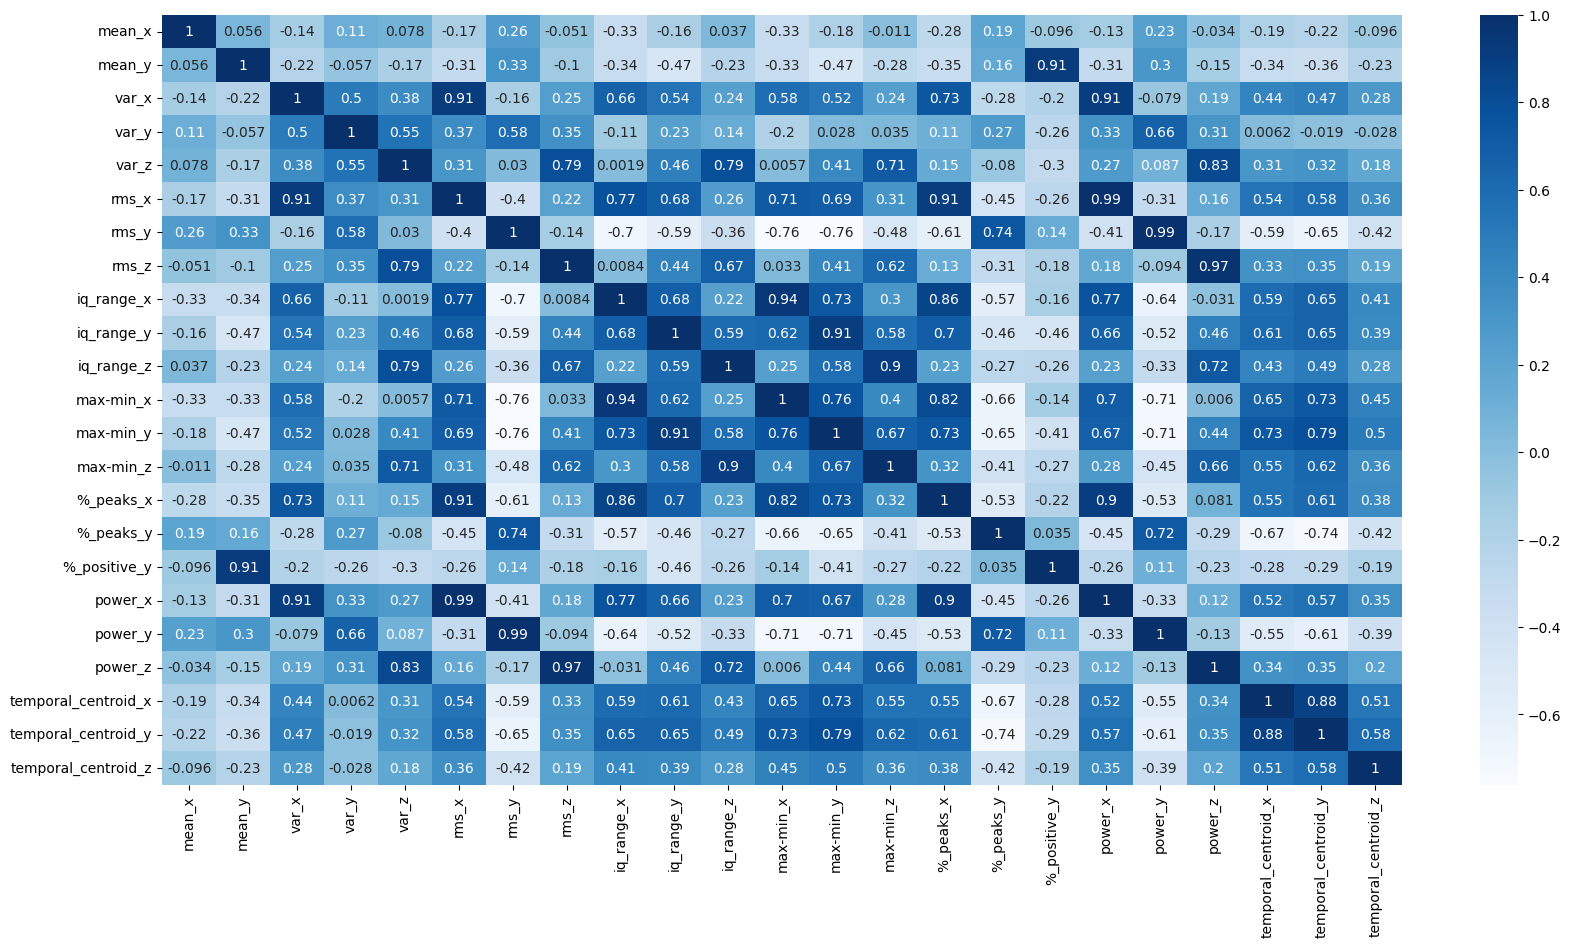

In [ ]:
Corr_matrix=data.iloc[:,:-1].corr()
plt.figure(figsize = (20,10))
sns.heatmap(Corr_matrix, annot=True, cmap="Blues")

In [ ]:
# remove highly correlated features 
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.iloc[:,:-1].corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(data, 0.8)
print('correlated features: ', corr_features)

correlated features:  {'power_z', 'rms_x', 'power_y', 'temporal_centroid_y', 'power_x', 'max-min_y', '%_positive_y', '%_peaks_x', 'max-min_x', 'max-min_z'}


#### Removing correlated features

In [ ]:
data = data.drop(corr_features,axis=1)
data

,mean_x,mean_y,var_x,var_y,var_z,rms_y,rms_z,iq_range_x,iq_range_y,iq_range_z,%_peaks_y,temporal_centroid_x,temporal_centroid_z,class
0,0.197327,0.984034,0.635922,1.034954,0.157123,1.415098,0.445838,0.275836,0.248840,0.247993,0.353293,49.637285,49.042419,1
1,0.256494,0.971935,0.358201,0.907888,0.149493,1.360884,0.388593,0.159835,0.138210,0.183719,0.294504,37.487597,38.069584,1
2,0.234874,0.987340,0.398661,0.952047,0.128058,1.387898,0.371314,0.192855,0.113570,0.250192,0.314229,38.245625,38.917355,1
3,0.135252,0.978889,0.551640,1.362784,0.195095,1.523179,0.486928,0.273812,0.233000,0.255942,0.412491,53.756702,53.309472,1
4,0.057615,0.968606,0.524964,1.285501,0.268192,1.490972,0.594972,0.228837,0.272480,0.259075,0.321545,60.549150,58.969607,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.418134,-0.397167,0.333795,0.477936,0.017336,0.797131,0.148226,1.051613,1.283470,0.087658,0.260609,125.034414,123.480492,2
464,-0.504110,-0.497165,0.235744,0.364027,0.019134,0.781598,0.138963,0.919282,1.050468,0.201518,0.163317,96.688278,105.869677,2
465,-0.504246,-0.564383,0.335457,0.303479,0.031983,0.788508,0.182351,0.987349,0.860910,0.263925,0.206897,99.040011,102.549907,2
466,-0.084112,-0.532522,0.115677,0.509875,0.268020,0.890602,0.674110,0.062300,1.200540,0.894475,0.203324,108.436436,108.972164,2


#### Final Features

<Axes: >

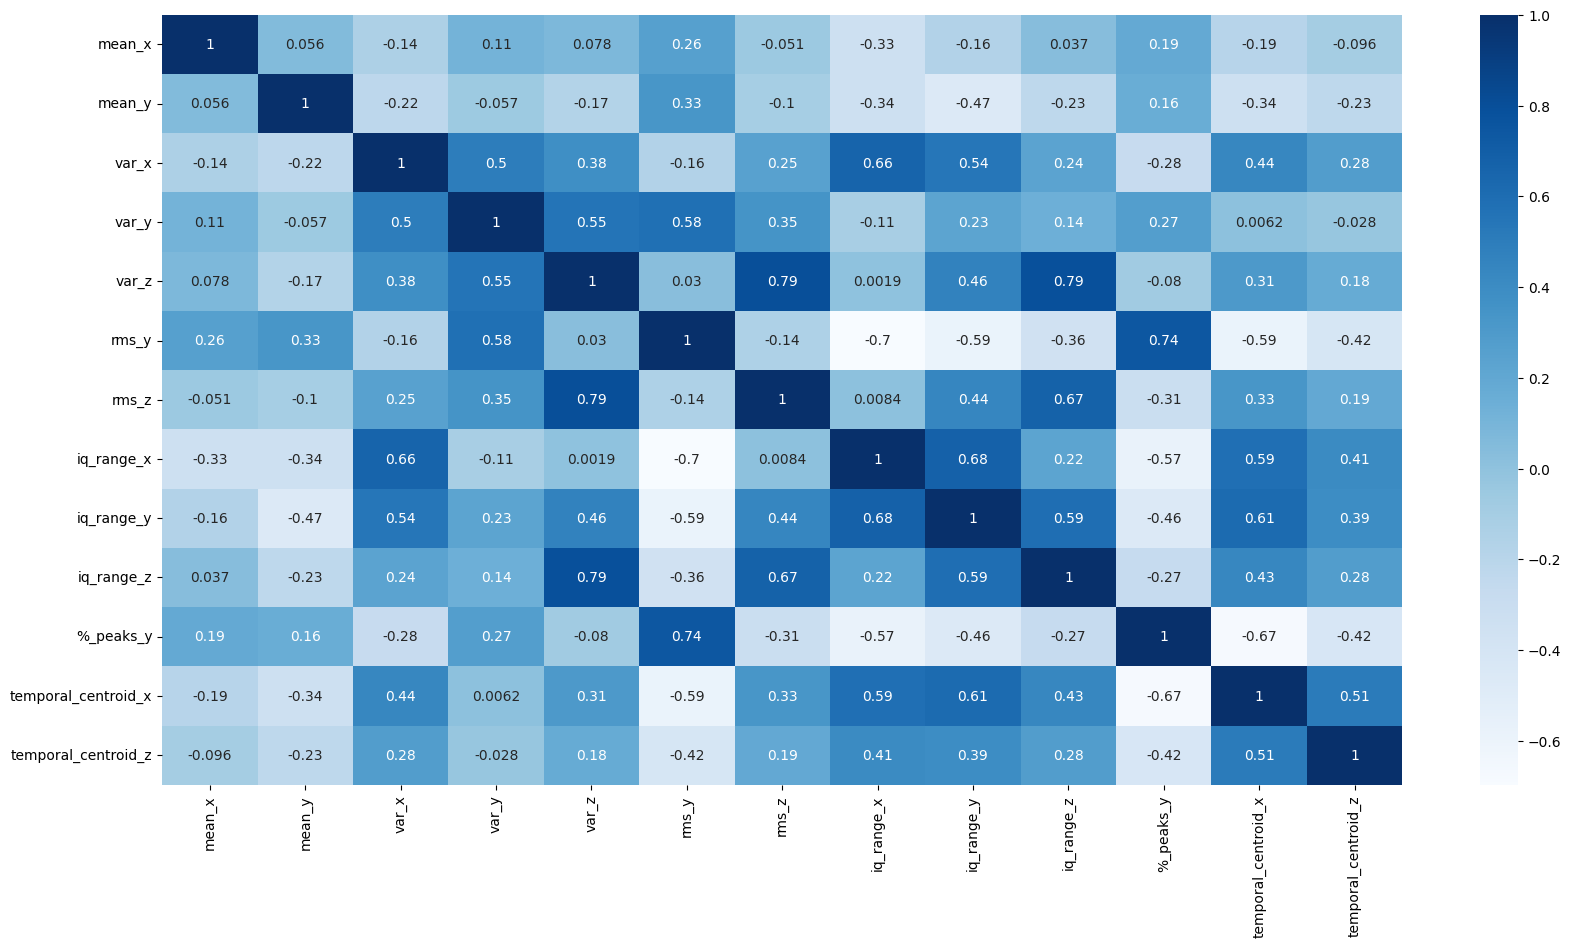

In [ ]:
Corr_matrix=data.iloc[:,:-1].corr() #between all possible pairs of variable, df è il nostro dataframe
plt.figure(figsize = (20,10))
sns.heatmap(Corr_matrix, annot=True, cmap="Blues")

### **Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

#### Normalization of the train set

In [ ]:
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Cross Validation applied to different models

In [ ]:
from sklearn.model_selection import cross_validate, GridSearchCV

#### SVM

In [ ]:
from sklearn import svm

svmc = svm.SVC(random_state=42)
param_grid = [{'kernel': ['linear'],'C': [1, 10, 100, 1000], 'gamma': [0]},
  {'kernel': ['rbf', 'poly', 'sigmoid'],'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], }, 
]

grid_search_svm = GridSearchCV(estimator=svmc, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train_scaled, y_train)
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.9839260312944524


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 10, 15, 20]
    }  

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'max_depth': 10, 'n_estimators': 400}
0.9733285917496444


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
reglog = LogisticRegression(multi_class='multinomial', random_state = 42)
scores = cross_validate(reglog, X_train_scaled, y_train, cv=10)

print(scores['test_score'].mean())

0.9758890469416788


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# perform grid search cv
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 20)), 'p': [1, 2]}
grid_search_knn = GridSearchCV(knn, params, cv=10, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

{'n_neighbors': 1, 'p': 1}
0.981294452347084


#### Select the best model 

In [ ]:
win_svm = svm.SVC(C=grid_search_svm.best_params_['C'],
                  kernel=grid_search_svm.best_params_['kernel'],
                  gamma=grid_search_svm.best_params_['gamma'],
                  random_state=42)

win_rf = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                max_depth=grid_search_rf.best_params_['max_depth'],
                                random_state=42)

win_knn = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_['n_neighbors'],p=grid_search_knn.best_params_['p'])

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_svm = cross_validate(win_svm, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_rf = cross_validate(win_rf, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_reglog = cross_validate(reglog, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_knn = cross_validate(win_knn, X_train_scaled, y_train, cv=10, scoring=scoring)

# Create a dataframe with first column with names of models and second column with mean accuracy scores
scores = pd.DataFrame({'model': ['svm', 'rf', 'reglog', 'knn'],
                       'accuracy': [scores_svm['test_accuracy'].mean(),
                                    scores_rf['test_accuracy'].mean(),
                                    scores_reglog['test_accuracy'].mean(),
                                    scores_knn['test_accuracy'].mean()],

                       'precision': [scores_svm['test_precision_macro'].mean(),
                                     scores_rf['test_precision_macro'].mean(),
                                     scores_reglog['test_precision_macro'].mean(),
                                     scores_knn['test_precision_macro'].mean()],

                       'recall': [scores_svm['test_recall_macro'].mean(),
                                  scores_rf['test_recall_macro'].mean(),
                                  scores_reglog['test_recall_macro'].mean(),
                                  scores_knn['test_recall_macro'].mean()],

                       'f1': [scores_svm['test_f1_macro'].mean(),
                              scores_rf['test_f1_macro'].mean(),
                              scores_reglog['test_f1_macro'].mean(),
                              scores_knn['test_f1_macro'].mean()]
                        })

# Print the dataframe
scores

,model,accuracy,precision,recall,f1
0,svm,0.983926,0.983739,0.982000,0.982296
1,rf,0.973329,0.969392,0.968742,0.967308
2,reglog,0.975889,0.975503,0.971773,0.972429
3,knn,0.981294,0.978879,0.977833,0.976803


#### Best SVM

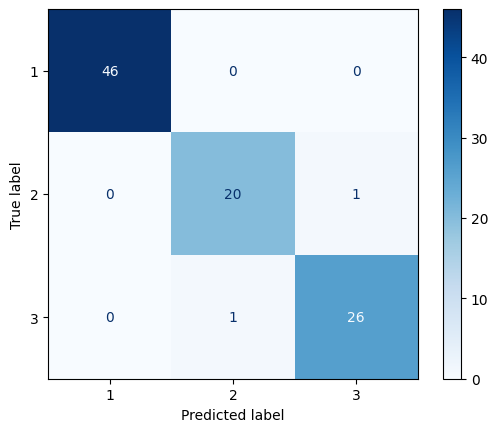

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

win_svm.fit(X_train_scaled, y_train)
y_pred = win_svm.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_svm.classes_)
disp.plot(cmap='Blues')

#### Best Forest

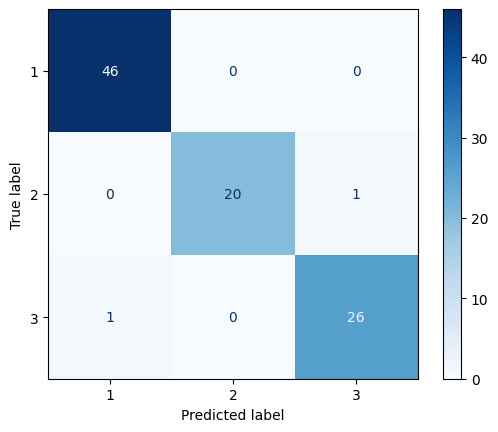

In [ ]:
win_rf.fit(X_train_scaled, y_train)
y_pred = win_rf.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_svm.classes_)
disp.plot(cmap='Blues')

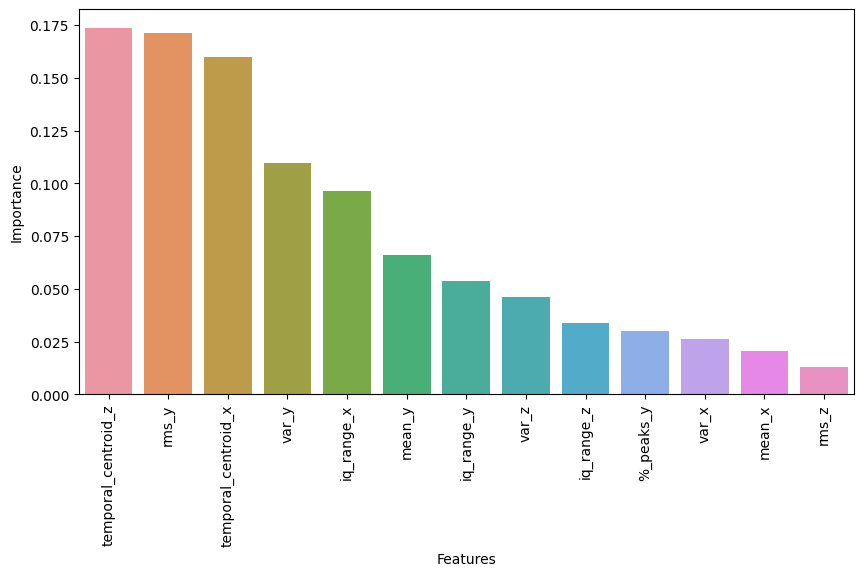

In [ ]:
# Get the feature importances
importances = win_rf.feature_importances_

# Create a dataframe of feature importances, sorted descendingly
feat = pd.DataFrame({'feature': X.columns,
                     'importance': importances}).sort_values('importance', ascending=False)

# Create a figure
plt.figure(figsize=(10, 5))

# Create a barplot of the feature importances
sns.barplot(x=feat.feature, y=feat.importance)

# Rotate tick marks on x-axis
plt.xticks(rotation=90)

# Create labels
plt.xlabel("Features")
plt.ylabel("Importance")

# Show plot
plt.show()